# Off-Facebook Analysis Report
## Tiffany Marks 

### Part 1

In [541]:
import pandas as pd
import json
import base64
import requests
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [542]:
ls

1018_in-class_Spotify.ipynb
Instagram miffanytarks_20220906/
Lecture_8-30_inclass.ipynb
Lecture_9-1_inclass.ipynb
Marks_Off-Facebook_Analysis_Report.ipynb
Marks_SystemsCheck.ipynb
Nov01_inclass.ipynb
Nov03_inclass.ipynb
Nov10_inclass.ipynb
Nov15_in-class.ipynb
Nov15_in-class_Spotify-track-data-collection-copy.ipynb
Nov17_in-class.ipynb
Oct04_in-class.ipynb
Oct18_in-class.ipynb
Oct27_in-class.ipynb
Sep6_in-class.ipynb
Sep8_in-class.ipynb
Sept22_in-class.ipynb
Spotify-Keys_10-18-22
Spotify-track-data-collection.ipynb
Twitter_Text_Report.ipynb
Twitter_Token_9-22-22
_likes_Report.ipynb
advertisers_who_uploaded_a_contact_list_with_your_information.json
audio_feature.csv
audio_features.csv
cces_example_data.csv
chinook.db
facebook-100084961286231/
facebook-davidsilva100046_year-to_share/
fulldf.cvs
fulldfSaved.cvs
heroes_information.csv*
matplotlibPractice.ipynb
recently_viewed.json
sqlite/


STEP 1: Here I am loading the json file the instructor shared with me

In [543]:
with open(r"/Users/tiffanymarks/DataInEMAT22110/facebook-davidsilva100046_year-to_share/apps_and_websites_off_of_facebook/your_off-facebook_activity.json") as t:
    off_facebook = json.load(t)

In [544]:
off_facebook

{'off_facebook_activity_v2': [{'name': 'Spotify: Spotify: Music and Podcasts',
   'events': [{'id': 174829003346,
     'type': 'CUSTOM',
     'timestamp': 1630869660}]},
  {'name': 'cameo.com',
   'events': [{'id': 443618109326032,
     'type': 'PAGE_VIEW',
     'timestamp': 1630700100},
    {'id': 443618109326032, 'type': 'PAGE_VIEW', 'timestamp': 1630700040},
    {'id': 443618109326032, 'type': 'PAGE_VIEW', 'timestamp': 1630698960},
    {'id': 443618109326032, 'type': 'PAGE_VIEW', 'timestamp': 1618863720},
    {'id': 443618109326032, 'type': 'PAGE_VIEW', 'timestamp': 1618863180}]},
  {'name': 'kent.edu',
   'events': [{'id': 661904321318543,
     'type': 'PAGE_VIEW',
     'timestamp': 1630694580},
    {'id': 155183341733912, 'type': 'PAGE_VIEW', 'timestamp': 1630694580},
    {'id': 597287964493316, 'type': 'PAGE_VIEW', 'timestamp': 1630694580},
    {'id': 597287964493316, 'type': 'PAGE_VIEW', 'timestamp': 1630693440},
    {'id': 155183341733912, 'type': 'PAGE_VIEW', 'timestamp': 1630

2. Because this data is not my data and I received it from my professor, David Silva, I would have to guess the apps and websites present in his data would related to his interest, that which I know very little of. He works for Kent State and likes soccer so Kent State and sports related apps and Website like ESPN are what I'm expecting.

STEP 3: Here is my process of Wrangling data into a DataFrame with a Name and Count Colume

In [545]:
faceData = pd.DataFrame(off_facebook['off_facebook_activity_v2'])

In [546]:
faceData.head()

,name,events
0,Spotify: Spotify: Music and Podcasts,"[{'id': 174829003346, 'type': 'CUSTOM', 'times..."
1,cameo.com,"[{'id': 443618109326032, 'type': 'PAGE_VIEW', ..."
2,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ..."
3,Allstate,"[{'id': 2702763333090634, 'type': 'CUSTOM', 't..."
4,Bed Bath & Beyond,"[{'id': 346165315733088, 'type': 'PURCHASE', '..."


3a. The event column has objects with items holding the values id, type and timestamp. Some rows have more than one item representing the times an app/website has logged your visit with Facebook

In [547]:
event = [len(x) for x in faceData['events']]

len() counts the number of items in each object of the Event column 

In [548]:
counting = pd.DataFrame(event)

In [549]:
counting.head()

,0
0,1
1,5
2,631
3,2
4,2


In [550]:
faceData['counting'] = counting

In [551]:
FacebookData = faceData.drop(columns = ['events'])

In [552]:
FacebookData.head()

,name,counting
0,Spotify: Spotify: Music and Podcasts,1
1,cameo.com,5
2,kent.edu,631
3,Allstate,2
4,Bed Bath & Beyond,2


STEP 4: Now I am turning the DataFrame into a histogram

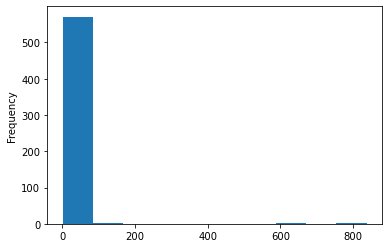

In [553]:
likes_hist = FacebookData['counting'].plot.hist()
plt.show()

4. The histogram data alone doesn't provide the names of these Websites/Apps alone, but from what I found in this histogram data is that a small number of Websites/Apps are sharing David Silvia's off Facebook activities to Facebook, being over 500 shared activities for both Websites/Apps. The majority of Websites/Apps only share less than 100 events and activities.  

STEP 5: Now I will make a bar plot of 20 of the most logged apps and websites.

In [554]:
FacebookData = faceData.sort_values('counting', ascending = False)

In [555]:
FBData = FacebookData.head(20)

In [556]:
FBData

,name,events,counting
36,TikTok,"[{'id': 597615686992125, 'type': 'ACTIVATE_APP...",838
2,kent.edu,"[{'id': 661904321318543, 'type': 'PAGE_VIEW', ...",631
230,"Hulu: Stream new TV shows, movies & series","[{'id': 40582213222, 'type': 'ACTIVATE_APP', '...",125
45,"Hulu: Watch TV shows, movies & new original se...","[{'id': 40582213222, 'type': 'ACTIVATE_APP', '...",118
6,sagepub.com,"[{'id': 806414442901154, 'type': 'CUSTOM', 'ti...",84
213,"Discord - Talk, Video Chat & Hang Out with Fri...","[{'id': 515083072013600, 'type': 'ACTIVATE_APP...",53
7,wiley.com,"[{'id': 263124174624252, 'type': 'CUSTOM', 'ti...",51
273,Hades' Star,"[{'id': 166973193707938, 'type': 'ACTIVATE_APP...",46
232,Fitbit,"[{'id': 106920676011663, 'type': 'CUSTOM', 'ti...",40
208,U.S. Bank - Inspired by customers,"[{'id': 1591992844216198, 'type': 'ACTIVATE_AP...",39


In [557]:
naming = FBData['name']
counted = FBData['counting']

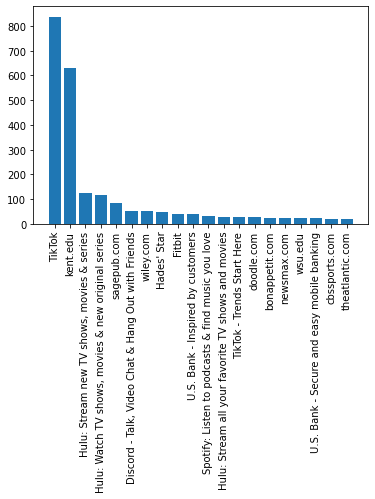

In [558]:
fig0, ax0 = plt.subplots()
ax0.bar(naming, counted)
plt.xticks(rotation='vertical')

plt.show()

5a. From this bar plot, I can see that TikTok and Kent State are the two Website sharing the most of David Silvia's activities to Facebook.

5b. On Facebooks's page on Reviewing Off-Facebook activity, https://www.facebook.com/help/2207256696182627/?helpref=uf_share, the company claims that Facebook can receive data from Organizations that use Facebook's Business Tools or when a user logs onto an app or website with Facebook. 

5c. Possibly Facebook is accurate if what I mentioned previously was the company's claim. Because this data is not mine, I have to make a few guesses. TikTok's tracking count could be so high because David Silvia logs onto TikTok with Facebook. I have no access to his TikTok account data and the folder with all his Facebook data doesn't have this information either. So I can not verify this with 100% confidence. For the Kent State count, it could be that he logs in with a Kent state email, but again I have don't have access to all his Facebook data.

### Part 2

Before Picking my albums I have to get access to my Spotify Developer information

In [559]:
keys = pd.read_csv("Spotify-Keys_10-18-22", header = 0, sep = ",")

In [560]:
appid = keys['Client_ID'][0]

In [561]:
appsecret = keys['Client_Secret'][0]

In [562]:
client_cred = base64.b64encode(str(appid + ":" + appsecret).encode('ascii'))

In [563]:
header = {'Authorization': 'Basic {}'.format(client_cred.decode('ascii'))}

In [564]:
payload = {'grant_type' : 'client_credentials'}
access_token_url = "https://accounts.spotify.com/api/token"

In [565]:
response = requests.post(access_token_url, headers = header, data = payload)

In [566]:
session_token = response.json()['access_token']

In [567]:
session_header = {'Authorization': 'Bearer {}'.format(response.json()['access_token'])}

STEP 6. I picked: Sgt. Pepper's Lonely Hearts Club Band Remastered) by the Beatles and Thriller by Michael Jackson. Sgt Pepper's was an album I was assigned to write a report on for a music class in high school. While listening to it for research I found that I liked all the songs. Thriller was an album that I slowly started liking through out high school and college. These are also just two albums where I like all the songs on each the album, so I can say they are albums I fully enjoy without skipping tracks.

STEP 7: Now I'll collect both albums track data

In [568]:
sgt_id = '6QaVfG1pHYl1z15ZxkvVDW'

In [569]:
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(sgt_id)

Adding Sgt Peppers album ID to the Spotify endpoint link to receive the track.

In [570]:
sgt_tracks = requests.get(album_tracks_endpoint, headers = session_header)

In [571]:
sgt_tracks.status_code

200

In [572]:
sgt_dict = json.loads(sgt_tracks.text)

In [573]:
sgt_dict.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [574]:
sgt_track_ids = [x['id'] for x in sgt_dict['items']]

In [575]:
sgt_track_ids

['4fUKE8EULjQdHF4zb0M8FO',
 '2RnPATK99oGOZygnD2GTO6',
 '25yQPHgC35WNnnOUqFhgVR',
 '3LtOmWpTXLhilL5odoKysR',
 '3pKKxkeB1pOUMHwWBmKc3Y',
 '3PjMtNzwhDHqxoKudm6GvF',
 '6W35n1UlkvqhfMZstB4BXs',
 '3Umg8CDhO8dOSj7yBTInYb',
 '1NrbnHlR2BFREcyWXHIHip',
 '6h9W5FxX4E9lUFsyq8j1AD',
 '0xIuNHHcKI1JDuBPlSwzb1',
 '42ocGQCOT0xYtV3f5kJDsD',
 '0hKRSZhUGEhKU6aNSPBACZ']

Now I have Sgt Peppers track IDs

In [576]:
sgt_track_strings = ','.join(str(x) for x in sgt_track_ids)
sgt_track_strings

'4fUKE8EULjQdHF4zb0M8FO,2RnPATK99oGOZygnD2GTO6,25yQPHgC35WNnnOUqFhgVR,3LtOmWpTXLhilL5odoKysR,3pKKxkeB1pOUMHwWBmKc3Y,3PjMtNzwhDHqxoKudm6GvF,6W35n1UlkvqhfMZstB4BXs,3Umg8CDhO8dOSj7yBTInYb,1NrbnHlR2BFREcyWXHIHip,6h9W5FxX4E9lUFsyq8j1AD,0xIuNHHcKI1JDuBPlSwzb1,42ocGQCOT0xYtV3f5kJDsD,0hKRSZhUGEhKU6aNSPBACZ'

Now I will get Audio Features for the tracks

In [577]:
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(sgt_track_strings)

In [578]:
sgt_features = requests.get(track_features_endpoint, headers = session_header)

In [579]:
sgt_features.status_code

200

In [580]:
sgt_dict = json.loads(sgt_features.text)

In [581]:
sgt_dict.keys()

dict_keys(['audio_features'])

In [582]:
sgt_dict['audio_features']

[{'danceability': 0.451,
  'energy': 0.673,
  'key': 7,
  'loudness': -9.115,
  'mode': 1,
  'speechiness': 0.0734,
  'acousticness': 0.0857,
  'instrumentalness': 0.00225,
  'liveness': 0.797,
  'valence': 0.583,
  'tempo': 95.513,
  'type': 'audio_features',
  'id': '4fUKE8EULjQdHF4zb0M8FO',
  'uri': 'spotify:track:4fUKE8EULjQdHF4zb0M8FO',
  'track_href': 'https://api.spotify.com/v1/tracks/4fUKE8EULjQdHF4zb0M8FO',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4fUKE8EULjQdHF4zb0M8FO',
  'duration_ms': 122893,
  'time_signature': 4},
 {'danceability': 0.705,
  'energy': 0.515,
  'key': 4,
  'loudness': -9.343,
  'mode': 1,
  'speechiness': 0.0337,
  'acousticness': 0.365,
  'instrumentalness': 0,
  'liveness': 0.389,
  'valence': 0.803,
  'tempo': 112.035,
  'type': 'audio_features',
  'id': '2RnPATK99oGOZygnD2GTO6',
  'uri': 'spotify:track:2RnPATK99oGOZygnD2GTO6',
  'track_href': 'https://api.spotify.com/v1/tracks/2RnPATK99oGOZygnD2GTO6',
  'analysis_url': 'https://api.

In [583]:
sgt_df = pd.DataFrame(sgt_dict['audio_features'])

In [584]:
sgt_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.451,0.673,7,-9.115,1,0.0734,0.0857,0.002250,0.7970,0.583,95.513,audio_features,4fUKE8EULjQdHF4zb0M8FO,spotify:track:4fUKE8EULjQdHF4zb0M8FO,https://api.spotify.com/v1/tracks/4fUKE8EULjQd...,https://api.spotify.com/v1/audio-analysis/4fUK...,122893,4
1,0.705,0.515,4,-9.343,1,0.0337,0.3650,0.000000,0.3890,0.803,112.035,audio_features,2RnPATK99oGOZygnD2GTO6,spotify:track:2RnPATK99oGOZygnD2GTO6,https://api.spotify.com/v1/tracks/2RnPATK99oGO...,https://api.spotify.com/v1/audio-analysis/2RnP...,164107,4
2,0.311,0.325,2,-9.042,1,0.0283,0.0469,0.000000,0.1390,0.668,65.090,audio_features,25yQPHgC35WNnnOUqFhgVR,spotify:track:25yQPHgC35WNnnOUqFhgVR,https://api.spotify.com/v1/tracks/25yQPHgC35WN...,https://api.spotify.com/v1/audio-analysis/25yQ...,208467,1
3,0.632,0.471,0,-7.887,1,0.0348,0.3130,0.000005,0.0712,0.764,121.672,audio_features,3LtOmWpTXLhilL5odoKysR,spotify:track:3LtOmWpTXLhilL5odoKysR,https://api.spotify.com/v1/tracks/3LtOmWpTXLhi...,https://api.spotify.com/v1/audio-analysis/3LtO...,168120,4
4,0.469,0.507,0,-8.917,0,0.0451,0.3820,0.000000,0.0783,0.619,112.984,audio_features,3pKKxkeB1pOUMHwWBmKc3Y,spotify:track:3pKKxkeB1pOUMHwWBmKc3Y,https://api.spotify.com/v1/tracks/3pKKxkeB1pOU...,https://api.spotify.com/v1/audio-analysis/3pKK...,156827,4
5,0.381,0.214,4,-11.629,1,0.0337,0.9440,0.000000,0.1060,0.393,127.581,audio_features,3PjMtNzwhDHqxoKudm6GvF,spotify:track:3PjMtNzwhDHqxoKudm6GvF,https://api.spotify.com/v1/tracks/3PjMtNzwhDHq...,https://api.spotify.com/v1/audio-analysis/3PjM...,215160,3
6,0.526,0.413,0,-9.865,1,0.0446,0.3380,0.000000,0.0992,0.710,111.874,audio_features,6W35n1UlkvqhfMZstB4BXs,spotify:track:6W35n1UlkvqhfMZstB4BXs,https://api.spotify.com/v1/tracks/6W35n1Ulkvqh...,https://api.spotify.com/v1/audio-analysis/6W35...,157533,4
7,0.352,0.479,6,-9.965,1,0.0338,0.3390,0.000353,0.4860,0.354,126.166,audio_features,3Umg8CDhO8dOSj7yBTInYb,spotify:track:3Umg8CDhO8dOSj7yBTInYb,https://api.spotify.com/v1/tracks/3Umg8CDhO8dO...,https://api.spotify.com/v1/audio-analysis/3Umg...,304667,4
8,0.704,0.241,1,-13.258,1,0.0476,0.6250,0.000028,0.0868,0.661,140.411,audio_features,1NrbnHlR2BFREcyWXHIHip,spotify:track:1NrbnHlR2BFREcyWXHIHip,https://api.spotify.com/v1/tracks/1NrbnHlR2BFR...,https://api.spotify.com/v1/audio-analysis/1Nrb...,157667,4
9,0.610,0.471,8,-9.151,0,0.0261,0.0634,0.000000,0.1180,0.630,87.379,audio_features,6h9W5FxX4E9lUFsyq8j1AD,spotify:track:6h9W5FxX4E9lUFsyq8j1AD,https://api.spotify.com/v1/tracks/6h9W5FxX4E9l...,https://api.spotify.com/v1/audio-analysis/6h9W...,162093,4


Repeat Process for Thriller Album

In [585]:
thriller_id = '2ANVost0y2y52ema1E9xAZ'
album_tracks_endpoint = "https://api.spotify.com/v1/albums/{}/tracks".format(thriller_id)
thriller_tracks = requests.get(album_tracks_endpoint, headers = session_header)
print(thriller_tracks.status_code)
thriller_dict = json.loads(thriller_tracks.text)
thriller_track_ids = [x['id'] for x in thriller_dict['items']]
thriller_track_strings = ','.join(str(x) for x in thriller_track_ids)
print(thriller_track_strings)
track_features_endpoint = "https://api.spotify.com/v1/audio-features?ids={}".format(thriller_track_strings)

200
1hu2s7qkm5bo03eODpRQO3,6XYbMGvtl6tlPoGWaiH7EY,4IT6vDuKprKl6jyVndlY8V,2LlQb7Uoj1kKyGhlkBf9aC,3BovdzfaX4jb5KFQwoPfAw,7J1uxwnxfQLu4APicE5Rnj,4cgjA7B4fJBHyB9Ya2bu0t,1CgmY8fVN7kstVDZmsdM5k,07L1pzoVerhRSSaDGZHrKy


In [586]:
thriller_features = requests.get(track_features_endpoint, headers = session_header)
thriller_features.status_code

200

In [587]:
thriller_dict = json.loads(thriller_features.text)
thriller_dict['audio_features'][0]

{'danceability': 0.842,
 'energy': 0.872,
 'key': 9,
 'loudness': -8.234,
 'mode': 1,
 'speechiness': 0.0455,
 'acousticness': 0.0259,
 'instrumentalness': 0.419,
 'liveness': 0.0573,
 'valence': 0.906,
 'tempo': 122.111,
 'type': 'audio_features',
 'id': '1hu2s7qkm5bo03eODpRQO3',
 'uri': 'spotify:track:1hu2s7qkm5bo03eODpRQO3',
 'track_href': 'https://api.spotify.com/v1/tracks/1hu2s7qkm5bo03eODpRQO3',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1hu2s7qkm5bo03eODpRQO3',
 'duration_ms': 363400,
 'time_signature': 4}

In [588]:
thriller_df = pd.DataFrame(thriller_dict['audio_features'])

In [589]:
thriller_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.842,0.872,9,-8.234,1,0.0455,0.0259,0.419000,0.0573,0.906,122.111,audio_features,1hu2s7qkm5bo03eODpRQO3,spotify:track:1hu2s7qkm5bo03eODpRQO3,https://api.spotify.com/v1/tracks/1hu2s7qkm5bo...,https://api.spotify.com/v1/audio-analysis/1hu2...,363400,4
1,0.843,0.483,11,-10.288,0,0.0950,0.0848,0.000008,0.0741,0.665,109.588,audio_features,6XYbMGvtl6tlPoGWaiH7EY,spotify:track:6XYbMGvtl6tlPoGWaiH7EY,https://api.spotify.com/v1/tracks/6XYbMGvtl6tl...,https://api.spotify.com/v1/audio-analysis/6XYb...,260667,4
2,0.681,0.527,9,-10.422,1,0.0561,0.2250,0.000000,0.0989,0.707,81.425,audio_features,4IT6vDuKprKl6jyVndlY8V,spotify:track:4IT6vDuKprKl6jyVndlY8V,https://api.spotify.com/v1/tracks/4IT6vDuKprKl...,https://api.spotify.com/v1/audio-analysis/4IT6...,222333,4
3,0.771,0.687,11,-9.814,1,0.0693,0.0318,0.000225,0.8900,0.783,118.392,audio_features,2LlQb7Uoj1kKyGhlkBf9aC,spotify:track:2LlQb7Uoj1kKyGhlkBf9aC,https://api.spotify.com/v1/tracks/2LlQb7Uoj1kK...,https://api.spotify.com/v1/audio-analysis/2LlQ...,357800,4
4,0.776,0.711,3,-9.030,0,0.0473,0.0242,0.000353,0.2340,0.901,138.728,audio_features,3BovdzfaX4jb5KFQwoPfAw,spotify:track:3BovdzfaX4jb5KFQwoPfAw,https://api.spotify.com/v1/tracks/3BovdzfaX4jb...,https://api.spotify.com/v1/audio-analysis/3Bov...,258400,4
5,0.932,0.457,11,-9.620,0,0.0541,0.0173,0.043600,0.0414,0.884,117.002,audio_features,7J1uxwnxfQLu4APicE5Rnj,spotify:track:7J1uxwnxfQLu4APicE5Rnj,https://api.spotify.com/v1/tracks/7J1uxwnxfQLu...,https://api.spotify.com/v1/audio-analysis/7J1u...,294227,4
6,0.628,0.409,2,-14.348,1,0.0306,0.4980,0.005650,0.2900,0.755,93.005,audio_features,4cgjA7B4fJBHyB9Ya2bu0t,spotify:track:4cgjA7B4fJBHyB9Ya2bu0t,https://api.spotify.com/v1/tracks/4cgjA7B4fJBH...,https://api.spotify.com/v1/audio-analysis/4cgj...,246040,4
7,0.894,0.670,11,-9.406,0,0.0474,0.1720,0.000363,0.0691,0.961,127.209,audio_features,1CgmY8fVN7kstVDZmsdM5k,spotify:track:1CgmY8fVN7kstVDZmsdM5k,https://api.spotify.com/v1/tracks/1CgmY8fVN7ks...,https://api.spotify.com/v1/audio-analysis/1Cgm...,239027,4
8,0.662,0.344,9,-13.930,0,0.0487,0.3690,0.000109,0.0589,0.436,146.016,audio_features,07L1pzoVerhRSSaDGZHrKy,spotify:track:07L1pzoVerhRSSaDGZHrKy,https://api.spotify.com/v1/tracks/07L1pzoVerhR...,https://api.spotify.com/v1/audio-analysis/07L1...,300107,4


I'll add an album column so I'll know what album each track id is from

In [590]:
sgt_df['album'] = ['sgt'] * len(sgt_df.index)

In [591]:
thriller_df['album'] = ['thriller'] * len(thriller_df.index)

Finally. I will merged the two Album DataFrames together

In [592]:
af = pd.concat([sgt_df, thriller_df])

In [593]:
af

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,album
0,0.451,0.673,7,-9.115,1,0.0734,0.0857,0.002250,0.7970,0.583,95.513,audio_features,4fUKE8EULjQdHF4zb0M8FO,spotify:track:4fUKE8EULjQdHF4zb0M8FO,https://api.spotify.com/v1/tracks/4fUKE8EULjQd...,https://api.spotify.com/v1/audio-analysis/4fUK...,122893,4,sgt
1,0.705,0.515,4,-9.343,1,0.0337,0.3650,0.000000,0.3890,0.803,112.035,audio_features,2RnPATK99oGOZygnD2GTO6,spotify:track:2RnPATK99oGOZygnD2GTO6,https://api.spotify.com/v1/tracks/2RnPATK99oGO...,https://api.spotify.com/v1/audio-analysis/2RnP...,164107,4,sgt
2,0.311,0.325,2,-9.042,1,0.0283,0.0469,0.000000,0.1390,0.668,65.090,audio_features,25yQPHgC35WNnnOUqFhgVR,spotify:track:25yQPHgC35WNnnOUqFhgVR,https://api.spotify.com/v1/tracks/25yQPHgC35WN...,https://api.spotify.com/v1/audio-analysis/25yQ...,208467,1,sgt
3,0.632,0.471,0,-7.887,1,0.0348,0.3130,0.000005,0.0712,0.764,121.672,audio_features,3LtOmWpTXLhilL5odoKysR,spotify:track:3LtOmWpTXLhilL5odoKysR,https://api.spotify.com/v1/tracks/3LtOmWpTXLhi...,https://api.spotify.com/v1/audio-analysis/3LtO...,168120,4,sgt
4,0.469,0.507,0,-8.917,0,0.0451,0.3820,0.000000,0.0783,0.619,112.984,audio_features,3pKKxkeB1pOUMHwWBmKc3Y,spotify:track:3pKKxkeB1pOUMHwWBmKc3Y,https://api.spotify.com/v1/tracks/3pKKxkeB1pOU...,https://api.spotify.com/v1/audio-analysis/3pKK...,156827,4,sgt
5,0.381,0.214,4,-11.629,1,0.0337,0.9440,0.000000,0.1060,0.393,127.581,audio_features,3PjMtNzwhDHqxoKudm6GvF,spotify:track:3PjMtNzwhDHqxoKudm6GvF,https://api.spotify.com/v1/tracks/3PjMtNzwhDHq...,https://api.spotify.com/v1/audio-analysis/3PjM...,215160,3,sgt
6,0.526,0.413,0,-9.865,1,0.0446,0.3380,0.000000,0.0992,0.710,111.874,audio_features,6W35n1UlkvqhfMZstB4BXs,spotify:track:6W35n1UlkvqhfMZstB4BXs,https://api.spotify.com/v1/tracks/6W35n1Ulkvqh...,https://api.spotify.com/v1/audio-analysis/6W35...,157533,4,sgt
7,0.352,0.479,6,-9.965,1,0.0338,0.3390,0.000353,0.4860,0.354,126.166,audio_features,3Umg8CDhO8dOSj7yBTInYb,spotify:track:3Umg8CDhO8dOSj7yBTInYb,https://api.spotify.com/v1/tracks/3Umg8CDhO8dO...,https://api.spotify.com/v1/audio-analysis/3Umg...,304667,4,sgt
8,0.704,0.241,1,-13.258,1,0.0476,0.6250,0.000028,0.0868,0.661,140.411,audio_features,1NrbnHlR2BFREcyWXHIHip,spotify:track:1NrbnHlR2BFREcyWXHIHip,https://api.spotify.com/v1/tracks/1NrbnHlR2BFR...,https://api.spotify.com/v1/audio-analysis/1Nrb...,157667,4,sgt
9,0.610,0.471,8,-9.151,0,0.0261,0.0634,0.000000,0.1180,0.630,87.379,audio_features,6h9W5FxX4E9lUFsyq8j1AD,spotify:track:6h9W5FxX4E9lUFsyq8j1AD,https://api.spotify.com/v1/tracks/6h9W5FxX4E9l...,https://api.spotify.com/v1/audio-analysis/6h9W...,162093,4,sgt


Full DataFrame with both Albums, each song and every Audio Feature

STEP 8. The Audio Features I'm selecting: energy and valence.

I think valence and energy of both of these albums are qualities of why I like them. Both albums both are very positive to me. The energy of both albums aren't super intense, like a Metal or Hyperpop album, but also aren't low energy either, a nice middle energy in my opinion.  

STEP 9: One figure with two separate axis. One Axis comparing the Energy of Both albums and the other Axis comparing the valence of both albums

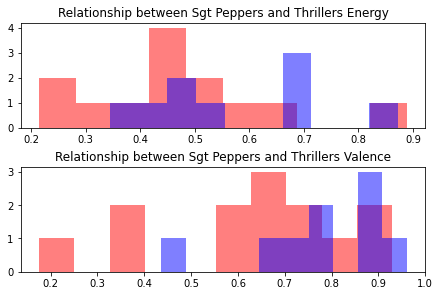

In [594]:
fig1, ax1 = plt.subplots(2, 1 ,layout = 'constrained')

sgt_En = af[af['album'] == 'sgt']['energy']
thrill_En = af[af['album'] == 'thriller']['energy']

sgt_Val = af[af['album'] == 'sgt']['valence']
thrill_Val = af[af['album'] == 'thriller']['valence']

ax1[0].hist(sgt_En, alpha = 0.5, color = 'red', label = 'SGT PEPPERS')
ax1[0].hist(thrill_En, alpha = 0.5, color = 'blue', label = 'Thriller')
ax1[0].set_title('Relationship between Sgt Peppers and Thrillers Energy')

ax1[1].hist(sgt_Val, alpha = 0.5, color = 'red', label = 'SGT PEPPERS')
ax1[1].hist(thrill_Val, alpha = 0.5, color = 'blue', label = 'Thriller')
ax1[1].set_title('Relationship between Sgt Peppers and Thrillers Valence')

plt.show()

STEP 9. From these two histograms I concluded that Thriller has more valence and energy than Sgt Peppers. More tracks on Thriller appear on the right side of the Valence histogram. Thriller has four songs with a higher energy than 12 out of 13 songs on Sgt Peppers. 

STEP 10: I made two scatter plot figures: One showing the relationship between Thrillers Energy and Valence and the other showing the relationship between Sgt Pepper's Energy and Valence

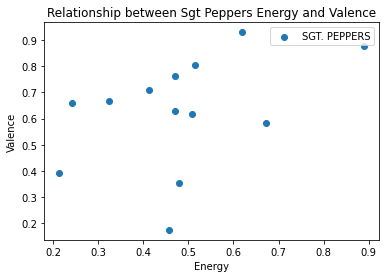

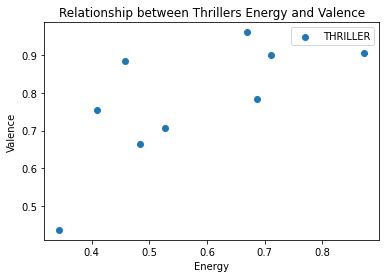

In [595]:
fig2, ax2 = plt.subplots()

sgt_En = af[af['album'] == 'sgt']['energy']
sgt_Val = af[af['album'] == 'sgt']['valence']

ax2.scatter(sgt_En, sgt_Val, label = 'SGT. PEPPERS')
ax2.set_xlabel('Energy')
ax2.set_ylabel('Valence')

ax2.set_title('Relationship between Sgt Peppers Energy and Valence')
ax2.legend()


fig3, ax3 = plt.subplots()

thrill_En = af[af['album'] == 'thriller']['energy']
thrill_Val = af[af['album'] == 'thriller']['valence']

ax3.scatter(thrill_En, thrill_Val, label = 'THRILLER')
ax3.set_xlabel('Energy')
ax3.set_ylabel('Valence')

ax3.set_title('Relationship between Thrillers Energy and Valence')
ax3.legend()
plt.show()

STEP 11: This one figure shows the relationship between the Valence and energy of both albums

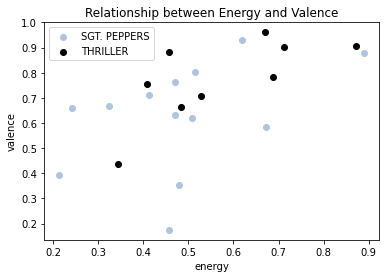

In [596]:
fig4, ax4 = plt.subplots()
sgt_data = af[af['album'] == 'sgt']
thrill_data = af[af['album'] == 'thriller']
ax4.scatter(sgt_data['energy'], sgt_data['valence'], label = 'SGT. PEPPERS', color = 'lightsteelblue')
ax4.scatter(thrill_data['energy'], thrill_data['valence'], label = 'THRILLER', color = 'black')
ax4.set_xlabel('energy')
ax4.set_ylabel('valence')
ax4.set_title('Relationship between Energy and Valence')
ax4.legend()
plt.show()

STEP 11. I can improve this figure and show the differences between the two albums by using different colors for both albums and adding x and y labels which I did. Adding a regression line can show how linear the audio feature's relationship is and a loess line make help show to energy and valence's relationship.

STEP 12: I now will create a boxplot with only the Valence feature

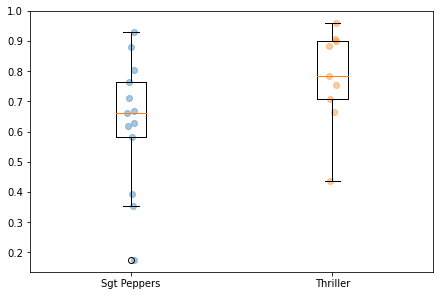

In [597]:
fig5, ax5 = plt.subplots(layout = 'constrained')
sgt_data = af[af['album'] == 'sgt']['valence']
thrill_data = af[af['album'] == 'thriller']['valence']
ax5.boxplot([sgt_data, thrill_data])

#the code below provides better visuals for the song data
sgt_x = [1] * len(sgt_data)
thriller_x = [2] * len(thrill_data)

sgt_x_jitter = np.random.uniform(-0.02, .02, len(sgt_x))
thriller_x_jitter = np.random.uniform(-0.02, .02, len(thriller_x))

ax5.scatter(sgt_x + sgt_x_jitter, sgt_data, alpha = .4)
ax5.scatter(thriller_x + thriller_x_jitter, thrill_data, alpha = .4)
ax5.set_xlim(0.5, 2.5)

ax5.set_xticks([1,2], ['Sgt Peppers','Thriller'])
plt.show()

STEP 13: Final Step, test for statistical differences using the ttest_ind() function

In [598]:
stats.ttest_ind(af[af['album'] == 'sgt']['valence'],af[af['album'] == 'thriller']['valence'])

Ttest_indResult(statistic=-1.7624863335096632, pvalue=0.09326393879750387)

13. The results of the ttest_ind() function tells me that the pvalue is 0.09. Since it's more than 0.05 it's not statistically significant. The statistic value is negative since I placed Sgt Pepper album before Thriller. Sgt Peppers average is less than Thriller's average If I rearranged the order the statistic value would be positive. So from the ttest I learned that Thriller as more valence than Sgt. Peppers